In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

In [3]:
# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Create dataframe for jobs in the US
df_US = df[df['job_country'] == 'United States']

In [6]:
# Separate job skills lists from job_skills column
df_skills = df_US.explode('job_skills')

# Show job_title and job_skills column
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [8]:
# Show job title counts related to every skill
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [9]:
# Show the data type for df_skills_count
type(df_skills_count)

pandas.core.series.Series

In [ ]:
# Rename the skills count column and change the data type to data frame
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [13]:
# Sort data frame by skill count descending
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [ ]:
# Show unique job titles in a list format
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Sort alphabetically and show top 3 results
job_titles = sorted(job_titles[:3])

# Show Results
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

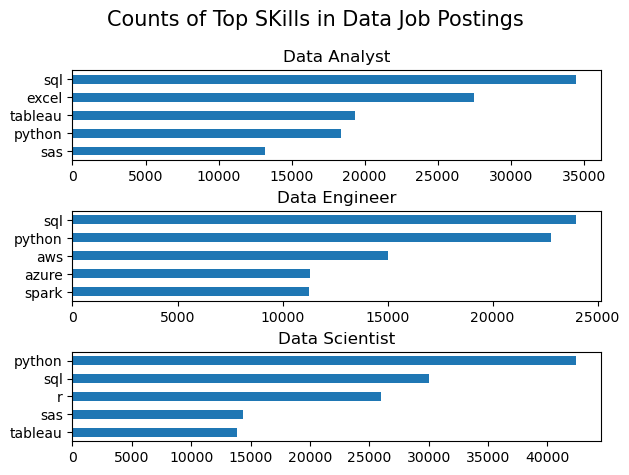

In [ ]:
# Plot skills counts for top three data roles
fig, ax = plt.subplots(len(job_titles), 1)

# Use for loop to pulll index and job titles
# Filter for the top 3 job titles and plot
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

plt.suptitle('Counts of Top SKills in Data Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()



In [26]:
# Get percent of total for skill counts for top skills in each role
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [30]:
# Merge above dataframe with job_title_short 
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

# Calculate perecent of total for skills
df_skills_percent['skill_percent'] = 100 * df_skills_percent['skill_count'] / df_skills_percent['jobs_total']

df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


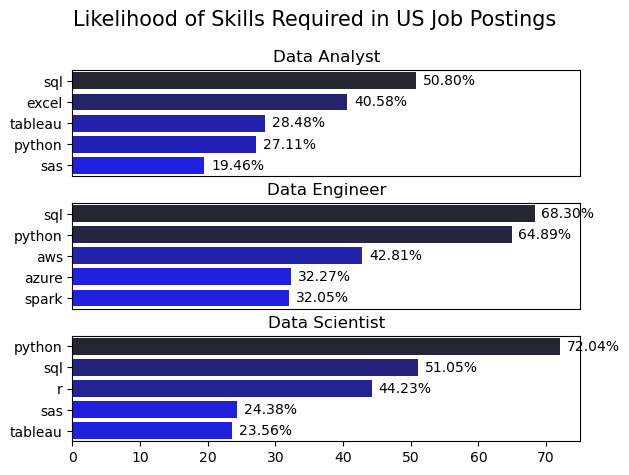

In [53]:
# Plot skills counts for top three data roles
fig, ax = plt.subplots(len(job_titles), 1)

# Use for loop to pulll index and job titles
# Filter for the top 3 job titles and plot
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    # ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 75)

    if i != len(job_titles) -1:
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1 ,n ,f'{v:.2f}%', va='center')

plt.suptitle('Likelihood of Skills Required in US Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()
